# Regresión Logística con Balanceo de datos

### Docente: M.Sc. Richard Fernández

In [ ]:
#conda install -c conda-forge imbalanced-learn

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as ss

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay #(antes plot_confusion_matrix)
from sklearn.metrics import roc_curve, auc, roc_auc_score

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from collections import Counter

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [4]:
train = pd.read_csv('churn-bigml-80.csv')

In [5]:
train["flag_muestra"] = "train"

In [6]:
train.head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,flag_muestra
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False,train
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False,train
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False,train
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False,train
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False,train


In [7]:
test = pd.read_csv('D:/Bases/Kaggle/Telecom Churn/churn-bigml-20.csv')

In [8]:
test["flag_muestra"] = "test"

In [9]:
test.head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,flag_muestra
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,...,29.89,215.8,90,9.71,8.7,4,2.35,1,False,test
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,...,19.42,208.8,111,9.40,12.7,6,3.43,4,True,test
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,...,27.01,160.6,128,7.23,5.4,9,1.46,4,True,test
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,...,11.67,189.6,105,8.53,7.7,6,2.08,2,False,test
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,...,18.28,178.7,90,8.04,11.1,1,3.00,1,False,test


In [10]:
data = train.append(test)

In [13]:
data['Area code'] = data['Area code'].astype(object)

In [15]:
data['Total minutes'] = data['Total day minutes'] + data['Total eve minutes'] + data['Total night minutes'] + data['Total intl minutes']

In [17]:
total_calls = data['Total day calls'] + data['Total eve calls'] + data['Total night calls'] + data['Total intl calls']
data.insert(loc=len(data.columns), column='Total calls', value=total_calls)

In [19]:
data['Total charge'] = data['Total day charge'] + data['Total eve charge'] + data['Total night charge'] + data['Total intl charge']


In [21]:
data = data.rename(columns = {'International plan':'International_plan'})
data = data.rename(columns = {'Voice mail plan':'Voice_mail_plan'})

In [23]:
data['c_International_plan'] = LabelEncoder().fit_transform(data.International_plan.values)
data['c_Voice_mail_plan'] = LabelEncoder().fit_transform(data.Voice_mail_plan.values)

In [36]:
data['Churn'] = data['Churn'].astype('int64')

In [69]:
y = y.to_numpy()

In [70]:
y[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [71]:
print(Counter(y))

Counter({0: 2850, 1: 483})


In [64]:
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X, y)

In [97]:
print(Counter(y))
print(Counter(y_smote))

Counter({0: 2850, 1: 483})
Counter({0: 2850, 1: 2850})


In [80]:
oversample = RandomOverSampler()
X_over, y_over = oversample.fit_resample(X, y)

In [81]:
print(Counter(y))
print(Counter(y_over))

Counter({0: 2850, 1: 483})
Counter({0: 2850, 1: 2850})


In [77]:
undersample = RandomUnderSampler()
X_under, y_under = undersample.fit_resample(X, y)

In [79]:
print(Counter(y))
print(Counter(y_under))

Counter({0: 2850, 1: 483})
Counter({0: 483, 1: 483})


In [140]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size = 0.20, random_state = 0)

In [141]:
X_train[0:5]

array([[  0.  ,   0.  ,   0.  , 576.6 ,  57.23,   2.  ],
       [  1.  ,   1.  ,  33.  , 638.6 ,  65.74,   2.  ],
       [  0.  ,   0.  ,   0.  , 634.5 ,  60.35,   2.  ],
       [  0.  ,   0.  ,   0.  , 711.1 ,  69.95,   1.  ],
       [  0.  ,   0.  ,   0.  , 537.8 ,  53.28,   0.  ]])

In [142]:
X_test[0:5]

array([[  0.  ,   0.  ,   0.  , 801.  ,  81.07,   2.  ],
       [  0.  ,   0.  ,   0.  , 574.3 ,  47.69,   0.  ],
       [  0.  ,   0.  ,   0.  , 621.1 ,  64.58,   0.  ],
       [  0.  ,   0.  ,   0.  , 752.3 ,  79.13,   0.  ],
       [  0.  ,   1.  ,  30.  , 613.8 ,  60.55,   0.  ]])

In [143]:
#Regresión Logística
classifier = LogisticRegression(max_iter = 1e5).fit(X_train, y_train)

In [144]:
y_pred = classifier.predict(X_test)

In [145]:
y_pred[0:20]

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1],
      dtype=int64)

In [146]:
y_test[0:20]

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1],
      dtype=int64)

In [147]:
confusion_matrix(y_test, y_pred)

array([[70, 21],
       [25, 78]], dtype=int64)

Confusion matrix, without normalization
[[70 21]
 [25 78]]
Normalized confusion matrix
[[0.76923077 0.23076923]
 [0.24271845 0.75728155]]


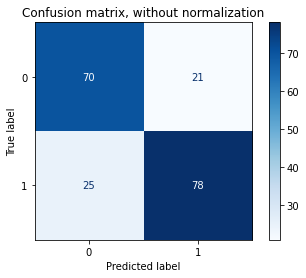

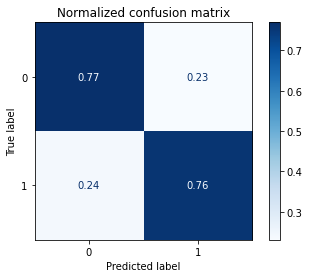

In [148]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test,
                                                 #display_labels=y_test,
                                                 cmap=plt.cm.Blues,
                                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [149]:
y_pred_prob = classifier.predict_proba(X_test)

In [150]:
y_pred_prob[0:5]

array([[0.19789437, 0.80210563],
       [0.91845537, 0.08154463],
       [0.75823196, 0.24176804],
       [0.49641289, 0.50358711],
       [0.89468961, 0.10531039]])

In [151]:
y_pred_prob[0:5,1]

array([0.80210563, 0.08154463, 0.24176804, 0.50358711, 0.10531039])

In [152]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob[:,1])

In [153]:
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8204416942281021

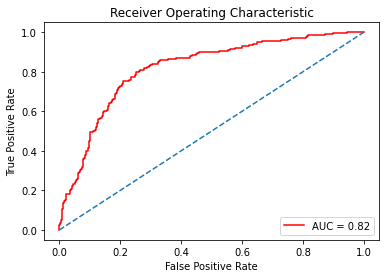

In [96]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       574
           1       0.59      0.18      0.28        93

    accuracy                           0.87       667
   macro avg       0.73      0.58      0.60       667
weighted avg       0.84      0.87      0.84       667



In [67]:
dataf = pd.concat([pd.DataFrame(X_test),pd.DataFrame(y_test),pd.DataFrame(y_pred),pd.DataFrame(y_pred_prob)],axis=1)

In [68]:
dataf.head(5)

,0,1,2,3,4,5,0,0,0,1
0,0.0,0.0,0.0,558.2,52.57,1.0,0,0,0.949214,0.050786
1,0.0,1.0,28.0,504.6,56.14,3.0,0,0,0.928500,0.071500
2,0.0,1.0,35.0,627.4,66.73,0.0,0,0,0.959501,0.040499
3,0.0,0.0,0.0,673.7,70.43,4.0,0,0,0.572886,0.427114
4,0.0,1.0,30.0,687.2,64.55,0.0,0,0,0.967496,0.032504


In [69]:
dataf.columns = ['c_International_plan','c_Voice_mail_plan','Number vmail messages','Total minutes','Total charge','Customer service calls','Churn', 'Churn_Pred', 'Churn_Pred_Prob_0', 'Churn_Pred_Prob_1']

In [70]:
dataf.head(10)

,c_International_plan,c_Voice_mail_plan,Number vmail messages,Total minutes,Total charge,Customer service calls,Churn,Churn_Pred,Churn_Pred_Prob_0,Churn_Pred_Prob_1
0,0.0,0.0,0.0,558.2,52.57,1.0,0,0,0.949214,0.050786
1,0.0,1.0,28.0,504.6,56.14,3.0,0,0,0.928500,0.071500
2,0.0,1.0,35.0,627.4,66.73,0.0,0,0,0.959501,0.040499
3,0.0,0.0,0.0,673.7,70.43,4.0,0,0,0.572886,0.427114
4,0.0,1.0,30.0,687.2,64.55,0.0,0,0,0.967496,0.032504
5,0.0,0.0,0.0,498.2,60.55,3.0,0,0,0.804822,0.195178
6,0.0,0.0,0.0,666.1,66.52,0.0,0,0,0.919751,0.080249
7,0.0,0.0,0.0,677.1,75.86,2.0,1,0,0.700197,0.299803
8,0.0,1.0,38.0,590.9,56.94,0.0,0,0,0.978312,0.021688
9,0.0,1.0,32.0,821.8,90.12,1.0,1,0,0.756260,0.243740


In [ ]:
#Tarea
#1.Comparar los modelos de regresión logística con SMOTE, OVER y UNDER

#=> Tabla con indicadores
#=> Gráfica de la curva ROC con los tres modelos
#=> Conclusiones